## Import Library & Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

## Data Preparation

In [ ]:
# delete useless features

df.drop(columns=['Gender', 'Age', 'Occupation'], inplace=True)

In [ ]:
# replace index

df.set_index('Person ID', inplace=True)

In [ ]:
# fill missing value

df['Sleep Disorder'].fillna('None', inplace=True)

<ipython-input-55-32fee381a67a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('None', inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sleep Duration           374 non-null    float64
 1   Quality of Sleep         374 non-null    int64  
 2   Physical Activity Level  374 non-null    int64  
 3   Stress Level             374 non-null    int64  
 4   BMI Category             374 non-null    object 
 5   Blood Pressure           374 non-null    object 
 6   Heart Rate               374 non-null    int64  
 7   Daily Steps              374 non-null    int64  
 8   Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 29.2+ KB


In [ ]:
# separate blood pressure into Systolic BP (mmHg) Diastolic BP (mmHg)

df[['Systolic Pressure', 'Diastolic Pressure']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

In [ ]:
df.drop(columns=['Blood Pressure'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sleep Duration           374 non-null    float64
 1   Quality of Sleep         374 non-null    int64  
 2   Physical Activity Level  374 non-null    int64  
 3   Stress Level             374 non-null    int64  
 4   BMI Category             374 non-null    object 
 5   Heart Rate               374 non-null    int64  
 6   Daily Steps              374 non-null    int64  
 7   Sleep Disorder           374 non-null    object 
 8   Systolic Pressure        374 non-null    int64  
 9   Diastolic Pressure       374 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 32.1+ KB


In [ ]:
#define features and targer
X = df.drop(columns='Sleep Disorder')
y = df['Sleep Disorder']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (374, 9)
Shape of y: (374,)


In [ ]:
df

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
Person ID,,,,,,,,,,
1,6.1,6,42,6,Overweight,77,4200,None,126,83
2,6.2,6,60,8,Normal,75,10000,None,125,80
3,6.2,6,60,8,Normal,75,10000,None,125,80
4,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
5,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...
370,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


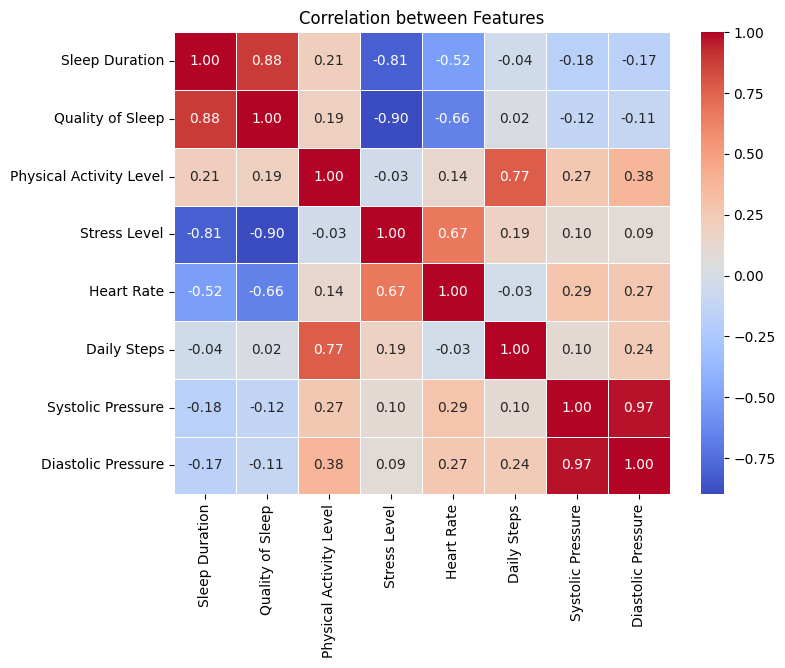

In [ ]:
# correlation features

# Calculate the correlation matrix
correlation_matrix = df[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Pressure', 'Diastolic Pressure']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation between Features')
plt.show()

In [ ]:
# normal, insomnia, apnea

category_counts = df['Sleep Disorder'].value_counts()

# Create a DataFrame from the counts
category_counts_df = pd.DataFrame(category_counts).reset_index()

# Rename the columns
category_counts_df.columns = ['Category', 'Count']

# Display the DataFrame
print(category_counts_df)

      Category  Count
0         None    219
1  Sleep Apnea     78
2     Insomnia     77


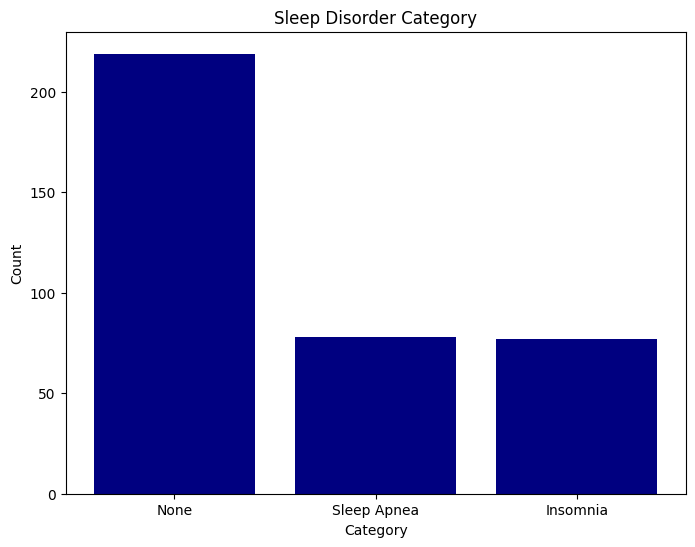

In [ ]:
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(category_counts_df['Category'], category_counts_df['Count'], color='navy')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Sleep Disorder Category')
plt.show()

In [ ]:
!pip install --upgrade scikit-learn


In [ ]:
# one hot

onehot_encoder = OneHotEncoder(categories='auto', sparse_output=False, drop='first')
X_encoded = onehot_encoder.fit_transform(X[['BMI Category']])

# Get the feature names after one-hot encoding
feature_names = onehot_encoder.get_feature_names_out(['BMI Category'])

# Create a DataFrame with the encoded features
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)
X_encoded_df.index = X_encoded_df.index + 1
X_encoded_df

,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
1,0.0,0.0,1.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
...,...,...,...
370,0.0,0.0,1.0
371,0.0,0.0,1.0
372,0.0,0.0,1.0
373,0.0,0.0,1.0


In [ ]:
# standardization / feature scaling

columns_to_scale = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Pressure', 'Diastolic Pressure']
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[columns_to_scale] = scaler.fit_transform(X_scaled[columns_to_scale])
X_scaled_df = X_scaled[columns_to_scale]
X_scaled_df

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure
Person ID,,,,,,,,
1,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584,-0.330002,-0.268102
2,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640
3,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640
4,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486
5,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486
...,...,...,...,...,...,...,...,...
370,1.218127,1.411435,0.760896,-1.345836,-0.524383,0.113356,1.479309,1.682049
371,1.092276,1.411435,0.760896,-1.345836,-0.524383,0.113356,1.479309,1.682049
372,1.218127,1.411435,0.760896,-1.345836,-0.524383,0.113356,1.479309,1.682049


In [ ]:
# Concatenate X

X_processed = pd.concat([X_scaled_df, X_encoded_df], axis=1)

X_processed

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
1,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584,-0.330002,-0.268102,0.0,0.0,1.0
2,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,0.0,0.0,0.0
3,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,0.0,0.0,0.0
4,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,0.0,1.0,0.0
5,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
370,1.218127,1.411435,0.760896,-1.345836,-0.524383,0.113356,1.479309,1.682049,0.0,0.0,1.0
371,1.092276,1.411435,0.760896,-1.345836,-0.524383,0.113356,1.479309,1.682049,0.0,0.0,1.0
372,1.218127,1.411435,0.760896,-1.345836,-0.524383,0.113356,1.479309,1.682049,0.0,0.0,1.0
373,1.218127,1.411435,0.760896,-1.345836,-0.524383,0.113356,1.479309,1.682049,0.0,0.0,1.0


In [ ]:
print(X_processed.shape, y.shape)

(374, 11) (374,)


In [ ]:
from imblearn.over_sampling import SMOTE
#Handling imbalance data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

In [ ]:
#from imblearn.under_sampling import RandomUnderSampler
# Handling imbalance data using Undersampling
#undersample = RandomUnderSampler(random_state=42)
#X_resampled, y_resampled = undersample.fit_resample(X_processed, y)

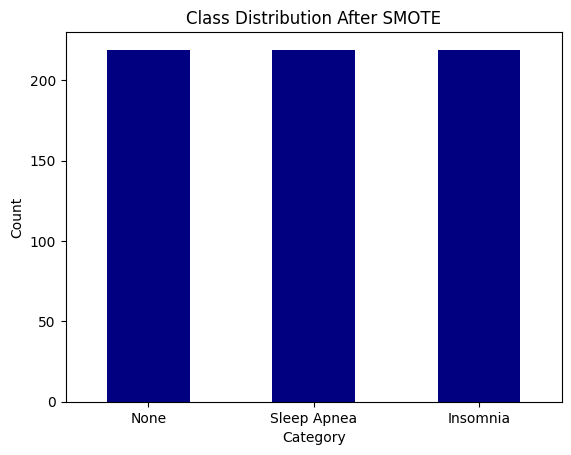

In [ ]:
# Show new class distribution
y_resampled.value_counts().plot(kind='bar', color='navy')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Class Distribution After SMOTE')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

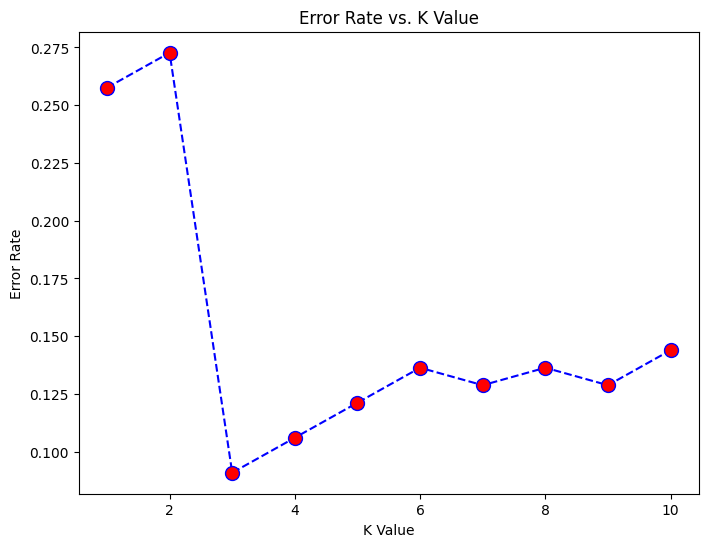

In [ ]:
# elbow method

# Calculate error for each value of k
error = []
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), error, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()


In [ ]:
# make a model

k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [ ]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# model evaluation

y_pred = knn_classifier.predict(X_test)

In [ ]:
# evaluate model

accuracy = accuracy_score(y_test, y_pred)

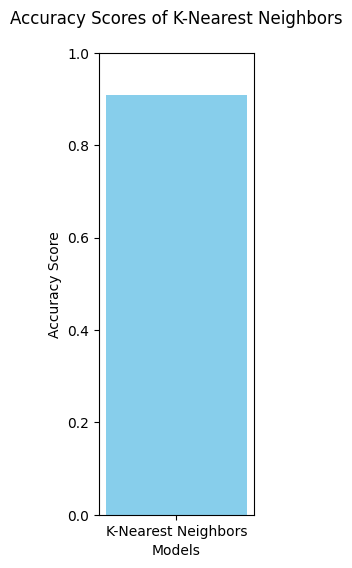

accuracy: 0.9090909090909091


In [ ]:
# Assuming you have computed accuracy scores for different models or scenarios
models = ['K-Nearest Neighbors']
accuracy = accuracy_score(y_test, y_pred)

# Plotting accuracy scores
plt.figure(figsize=(2, 6))
plt.bar(models, accuracy, color='skyblue')
plt.ylim(0, 1)  # Limit y-axis from 0 to 1 for accuracy
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of K-Nearest Neighbors\n')
plt.show()

print('accuracy:', accuracy)

In [ ]:
print('accuracy:', accuracy)

accuracy: 0.9090909090909091


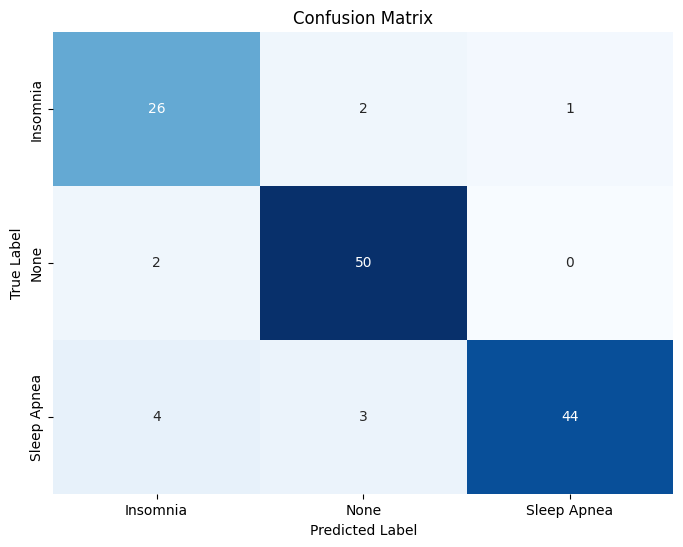

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Insomnia', 'None' ,'Sleep Apnea'],
            yticklabels=['Insomnia', 'None' ,'Sleep Apnea'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np

print(np.unique(y_test))  # Cek urutan label di y_test


['Insomnia' 'None' 'Sleep Apnea']


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=['None', 'Sleep Apnea', 'Insomnia'])

In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are already defined
report = classification_report(y_test, y_pred)

print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

    Insomnia       0.81      0.90      0.85        29
        None       0.91      0.96      0.93        52
 Sleep Apnea       0.98      0.86      0.92        51

    accuracy                           0.91       132
   macro avg       0.90      0.91      0.90       132
weighted avg       0.91      0.91      0.91       132



In [ ]:
# Error rate calculation
error = []
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate = np.mean(pred_i != y_test)
    error.append(error_rate)
    print(f'Error rate for k={i}: {error_rate:.4f}')

Error rate for k=1: 0.2576
Error rate for k=2: 0.2727
Error rate for k=3: 0.0909
Error rate for k=4: 0.1061
Error rate for k=5: 0.1212
Error rate for k=6: 0.1364
Error rate for k=7: 0.1288
Error rate for k=8: 0.1364
Error rate for k=9: 0.1288
Error rate for k=10: 0.1439
